# Wstęp do Sztucznej Inteligencji - rok akademicki 2023/2024

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat:  Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

Na niniejszych laboratoriach będziemy wykorzystywać bibliotekę `fuzzython`(https://github.com/yudivian/fuzzython). Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby móc z niego zkorzystać należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na delcie), rozpakować go i wrzucić na dysk google, a następnie wykonać poniższą komórkę montującą dysk google:


In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
# upewniej się że poniższa ścieżka jest poprawna
path_nb = r'/content/drive/My Drive/Colab Notebooks/WdSI_2023/T4_Fuzzy'
sys.path.append(path_nb)

Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

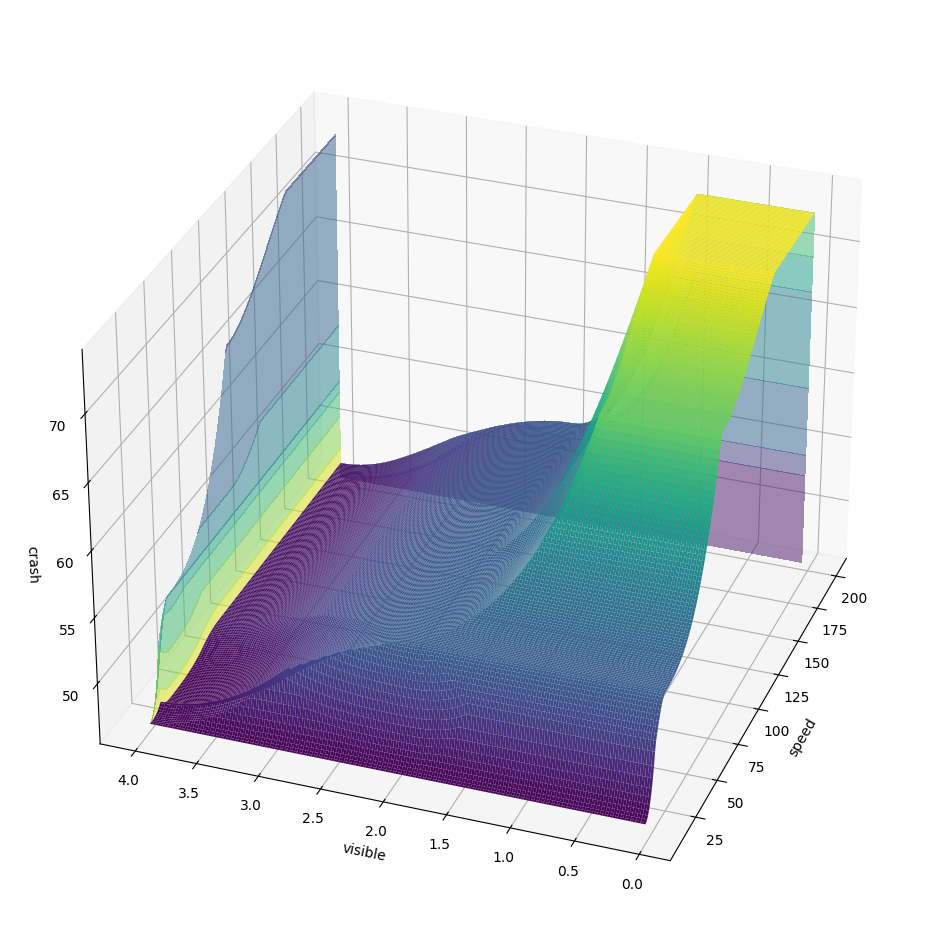

In [2]:
#YOUR CODE HERE

from fuzzython.adjective import Adjective
from fuzzython.systems.mamdani import MamdaniSystem
from fuzzython.ruleblock import RuleBlock
from fuzzython.variable import Variable
from fuzzython.fsets.triangular import Triangular
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

speedLow = Triangular((-0.1, 0.0), (10, 1), (30, 0))
speedMedium = Triangular((10, 0), (30, 1), (90, 0))
speedHigh = Triangular((30.0, 0), (90, 1), (150, 0))
speedValueHigh = Triangular((90, 0.0), (150, 1), (200.1, 1))
adjectiveSpeedLow = Adjective('speedLow', speedLow)
adjectiveSpeedMedium = Adjective('speedMedium', speedMedium)
adjectiveSpeedHigh = Adjective('speedHigh', speedHigh)
adjectiveSpeedValueHigh = Adjective('speedValueHigh', speedValueHigh)
speed = Variable('speed', 'kmh', adjectiveSpeedLow, adjectiveSpeedMedium, adjectiveSpeedHigh, adjectiveSpeedValueHigh)

v_low = Triangular((0.04, 1), (1, 1), (2, 0.0))
v_medium = Triangular((1, 0), (2, 1), (4, 0))
v_high = Triangular((2.0, 0), (4, 1), (4.1, 1))
a_v_low = Adjective('v_low', v_low)
a_v_medium = Adjective('v_medium', v_medium)
a_v_high = Adjective('v_high', v_high)
visible = Variable('visible', 'km', a_v_low, a_v_medium, a_v_high)


c_low = Triangular((-0.1, 0), (0, 1), (50, 0))
c_medium = Triangular((0,0), (45, 1), (66, 0))
c_high = Triangular((25,0), (75,1), (100, 0))
c_v_high = Triangular((70, 0), (82, 1), (100.1, 1))
a_c_low = Adjective('c_low', c_low)
a_c_medium = Adjective('c_medium', c_medium)
a_c_high = Adjective('c_high', c_high)
a_c_v_high = Adjective('c_v_high', c_v_high)
crash = Variable('crash', '%', a_c_low, a_c_medium, a_c_high, a_c_v_high, defuzzification='COG', default = 0)


scope = locals()

rule1 = 'if speed is a_s_v_high and visible is a_v_low then crash is a_c_v_high'
rule2 = 'if speed is a_s_low or visible is a_v_high then crash is a_c_low'
rule3 = 'if speed is a_v_high or visible is a_v_low then crash is a_c_high'
rule4 = 'if visible is a_v_medium or speed is a_s_medium then crash is a_c_medium'
rule5 = 'if visible is a_c_low and speed is a_s_low then crash is a_c_medium'
rule6 = 'if visible is a_v_high and speed is a_s_low crash is a_c_low'

block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, rule4, rule5, scope=scope)

mamdani = MamdaniSystem('mamdani_model', block)

sampledx = np.linspace(10, 200, 200)
sampledy = np.linspace(0.05, 4, 200)
x, y = np.meshgrid(sampledx, sampledy)
z = np.zeros((len(sampledx),len(sampledy)))

for i in range(len(sampledx)):
    for j in range(len(sampledy)):
        inputs = {'speed': x[i, j], 'visible': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['crash']
            
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= 0, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 200, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 4, cmap='viridis', alpha=0.5)
ax.set_xlabel('speed')
ax.set_ylabel('visible')
ax.set_zlabel('crash')
ax.view_init(30, 200)

## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

In [ ]:
# YOUR CODE HERE

&copy; Katedra Informatyki, Politechnika Krakowska